
# 📊 Analyse Exploratoire des Joueurs FIFA

Ce notebook a pour objectif de réaliser une **analyse exploratoire des données FIFA**, en se concentrant sur les caractéristiques des joueurs : âge, poste, valeur, statistiques techniques, etc.  
Nous allons suivre deux grandes étapes :
1. **Data Acquisition** (acquisition et chargement des données)
2. **Data Understanding** (compréhension et exploration des données)



## 🟦 1. Data Acquisition

Dans cette section, nous chargeons le dataset contenant les informations des joueurs FIFA.  
Les données proviennent d'un fichier CSV local : `fifa_eda_stats.csv`, et sont chargées à l'aide de la bibliothèque **pandas**.


In [13]:
import pandas as pd
import numpy as np


In [15]:
df = pd.read_csv("C:/Users/pc/Desktop/fifa_eda_stats.csv", sep=';')
df.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M



## 🟧 2. Data Understanding

L'objectif ici est de mieux comprendre les données à travers des statistiques descriptives, la gestion des valeurs manquantes, des visualisations et l'analyse de corrélations entre variables.


### 🔍 2.1 Aperçu du dataset
Dans cette étape, nous explorons la structure globale du dataset (dimensions, types de données, aperçu des premières lignes, etc.).

### ❓ 2.2 Valeurs manquantes
Nous analysons ici les colonnes contenant des valeurs nulles (NaN) pour planifier un nettoyage adapté.

### 🧼 2.3 Nettoyage et transformation des données
Dans cette étape, nous traitons les données manquantes, convertissons les types de données (dates, valeurs monétaires, etc.) et préparons le dataset pour l’analyse.

### 📊 2.4 Visualisations utiles
Nous utilisons des graphiques pour explorer les distributions de variables importantes comme l’âge, la valeur, ou les performances.

### 🔗 2.5 Corrélation entre variables
Nous analysons les corrélations statistiques entre les variables numériques pour identifier des relations intéressantes ou des redondances.

### 🧠 2.6 Segmentation par âge, position, etc.
Nous segmentons les joueurs par groupes d’âge, postes ou clubs afin d'étudier les tendances globales par catégorie.

### 🚨 2.7 Détection de cas atypiques
Nous repérons les joueurs aux profils inhabituels, comme ceux très bien notés mais sous-évalués ou sous-payés.

In [17]:
df_backup = df.copy()


In [19]:
df.info()
df.shape
df.columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18179 non-null  object 
 8   Wage                      18179 non-null  object 
 9   Preferred Foot            18131 non-null  object 
 10  International Reputation  18131 non-null  float64
 11  Weak Foot                 18131 non-null  float64
 12  Skill Moves               18131 non-null  float64
 13  Work Rate                 18131 non-null  object 
 14  Body T

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18131.000000,18131.000000,18131.000000,18119.000000,18131.000000,18131.000000,...,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113397,2.947217,2.361701,19.544401,49.743202,45.562848,...,48.560807,58.658541,47.276212,47.697149,45.660030,16.618057,16.393194,16.231758,16.390822,16.710937
std,29965.244204,4.669943,6.908930,6.136496,0.394310,0.660462,0.756292,15.952570,18.365938,19.523393,...,15.706617,11.432878,19.909676,21.670806,21.296616,17.697405,16.909519,16.503546,17.037065,17.960529
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [25]:
df.isnull().sum().sort_values(ascending=False)


Loaned From                 16944
Release Clause               1591
Joined                       1580
Contract Valid Until          317
Club                          241
Jersey Number                  88
Position                       88
GKDiving                       76
SlidingTackle                  76
Agility                        76
Reactions                      76
Balance                        76
ShotPower                      76
Jumping                        76
Stamina                        76
Strength                       76
LongShots                      76
Aggression                     76
Interceptions                  76
GKReflexes                     76
GKPositioning                  76
GKKicking                      76
GKHandling                     76
Acceleration                   76
Positioning                    76
Vision                         76
Penalties                      76
Composure                      76
Marking                        76
StandingTackle

In [27]:
# Étape 5 : Traitement des valeurs manquantes
def handle_missing_values(df):
    """
    Remplace les valeurs manquantes sans altérer la structure du dataset :
    - Mode pour les colonnes catégorielles
    - Médiane pour les colonnes numériques
    - Valeur par défaut pour les colonnes textuelles comme 'No Club', 'Unknown'
    """
    df_filled = df.copy()

    # Afficher les valeurs manquantes avant traitement
    print("📊 Valeurs manquantes AVANT traitement :")
    display(df_filled.isnull().sum()[df_filled.isnull().sum() > 0])

    fill_values = {
        'Club': "No Club",
        'Preferred Foot': df_filled['Preferred Foot'].mode()[0],
        'International Reputation': df_filled['International Reputation'].median(),
        'Weak Foot': df_filled['Weak Foot'].median(),
        'Skill Moves': df_filled['Skill Moves'].median(),
        'Work Rate': df_filled['Work Rate'].mode()[0],
        'Body Type': df_filled['Body Type'].mode()[0],
        'Position': "Unknown",
        'Jersey Number': df_filled['Jersey Number'].median(),
        'Height': df_filled['Height'].mode()[0],
        'Weight': df_filled['Weight'].mode()[0]
    }

    # Remplir les colonnes définies
    df_filled = df_filled.fillna(value=fill_values)

    # Remplir tout le reste des NaN avec 0 (par sécurité)
    df_filled = df_filled.fillna(0)

    # Vérification après traitement
    print("\n📉 Valeurs manquantes APRÈS traitement :")
    total_missing = df_filled.isnull().sum().sum()
    if total_missing == 0:
        print("✅ Toutes les valeurs manquantes ont été traitées avec succès !")
    else:
        print(f"⚠️ Il reste {total_missing} valeurs manquantes dans le dataset.")
        display(df_filled.isnull().sum()[df_filled.isnull().sum() > 0])

    return df_filled

# Appliquer le traitement
df = handle_missing_values(df)


📊 Valeurs manquantes AVANT traitement :


Club                          241
Value                          28
Wage                           28
Preferred Foot                 76
International Reputation       76
Weak Foot                      76
Skill Moves                    76
Work Rate                      76
Body Type                      76
Position                       88
Jersey Number                  88
Joined                       1580
Loaned From                 16944
Contract Valid Until          317
Height                         76
Weight                         76
Crossing                       76
Finishing                      76
HeadingAccuracy                76
ShortPassing                   76
Volleys                        76
Dribbling                      76
Curve                          76
FKAccuracy                     76
LongPassing                    76
BallControl                    76
Acceleration                   76
SprintSpeed                    76
Agility                        76
Reactions     


📉 Valeurs manquantes APRÈS traitement :
✅ Toutes les valeurs manquantes ont été traitées avec succès !


In [29]:
# 🟦 8. Conversion de types : dates

# Conversion des colonnes en datetime
df["Joined"] = pd.to_datetime(df["Joined"], errors='coerce')
df["Contract Valid Until"] = pd.to_datetime(df["Contract Valid Until"], errors='coerce')

# Création de nouvelles colonnes pour l'analyse
df["Joined_Year"] = df["Joined"].dt.year
df["Contract_Year"] = df["Contract Valid Until"].dt.year

# Exemple : calcul de l'ancienneté dans le club (en années)
df["Years_In_Club"] = 2025 - df["Joined_Year"]

# Vérification rapide
print(df[["Joined", "Joined_Year", "Contract Valid Until", "Contract_Year", "Years_In_Club"]].head())


      Joined  Joined_Year Contract Valid Until  Contract_Year  Years_In_Club
0 2004-07-01       2004.0           2021-01-01         2021.0           21.0
1 2018-07-10       2018.0           2022-01-01         2022.0            7.0
2 2017-08-03       2017.0           2022-01-01         2022.0            8.0
3 2011-07-01       2011.0           2020-01-01         2020.0           14.0
4 2015-08-30       2015.0           2023-01-01         2023.0           10.0


In [31]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [33]:
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      18207 non-null  object        
 7   Value                     18207 non-null  object        
 8   Wage                      18207 non-null  object        
 9   Preferred Foot            18207 non-null  object        
 10  International Reputation  18207 non-null  float64       
 11  Weak Foot                 18207 non-null  float64       
 12  Skill Moves       

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Joined_Year,Contract_Year,Years_In_Club
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,2004.0,2021.0,21.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,2018.0,2022.0,7.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,2017.0,2022.0,8.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,2011.0,2020.0,14.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,2015.0,2023.0,10.0


In [35]:
df["Contract_Year"] = df["Contract_Year"].fillna(2025)


In [37]:
def convert_currency(value_str):
    if isinstance(value_str, str):
        value_str = value_str.replace("€", "").replace("M", "e6").replace("K", "e3")
        try:
            return float(eval(value_str))  # ex: '110.5e6' -> 110500000.0
        except:
            return np.nan
    return value_str

df["Value"] = df["Value"].apply(convert_currency)
df["Release Clause"] = df["Release Clause"].apply(convert_currency)


In [39]:
df.isnull().sum()[df.isnull().sum() > 0]


Joined                  1580
Contract Valid Until    1580
Joined_Year             1580
Years_In_Club           1580
dtype: int64

In [43]:
df["Contract_Year"] = df["Contract_Year"].fillna(2025)
df["Contract Valid Until"] = df["Contract Valid Until"].fillna(pd.Timestamp("2025-06-30"))


In [45]:
print(df["Contract Valid Until"].isnull().sum())  # doit afficher 0
print(df["Contract_Year"].isnull().sum())         # doit aussi afficher 0


0
0


🎯 Vérification après remplissage :
Contract Valid Until missing: 0
Contract_Year missing: 0


,Name,Club,Contract_Year,Years_Remaining,Contract_Status
0,L. Messi,FC Barcelona,2021.0,-4.0,Expiring Soon
1,Cristiano Ronaldo,Juventus,2022.0,-3.0,Expiring Soon
2,Neymar Jr,Paris Saint-Germain,2022.0,-3.0,Expiring Soon
3,De Gea,Manchester United,2020.0,-5.0,Expiring Soon
4,K. De Bruyne,Manchester City,2023.0,-2.0,Expiring Soon
5,E. Hazard,Chelsea,2020.0,-5.0,Expiring Soon
6,L. Modrić,Real Madrid,2020.0,-5.0,Expiring Soon
7,L. Suárez,FC Barcelona,2021.0,-4.0,Expiring Soon
8,Sergio Ramos,Real Madrid,2020.0,-5.0,Expiring Soon
9,J. Oblak,Atlético Madrid,2021.0,-4.0,Expiring Soon


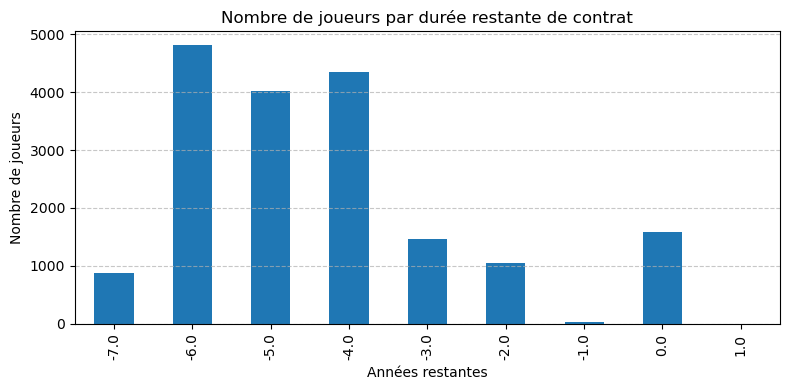

In [47]:
import datetime
import matplotlib.pyplot as plt

# 🔎 Vérification de la présence de valeurs manquantes
print("🎯 Vérification après remplissage :")
print("Contract Valid Until missing:", df["Contract Valid Until"].isnull().sum())
print("Contract_Year missing:", df["Contract_Year"].isnull().sum())

# 📆 Récupération de l’année actuelle
current_year = datetime.datetime.now().year

# 🧮 Calcul de la durée restante du contrat
df["Years_Remaining"] = df["Contract_Year"] - current_year

# 🏷 Création d'une étiquette selon la durée restante
df["Contract_Status"] = df["Years_Remaining"].apply(lambda x: "Expiring Soon" if x <= 1 else "Valid")

# 👁️‍🗨️ Aperçu des nouvelles colonnes
display(df[["Name", "Club", "Contract_Year", "Years_Remaining", "Contract_Status"]].head(10))

# 📊 Visualisation des années restantes
df["Years_Remaining"].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Nombre de joueurs par durée restante de contrat")
plt.xlabel("Années restantes")
plt.ylabel("Nombre de joueurs")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [49]:
import numpy as np
import re

# 💰 Fonction pour convertir les montants en euros (ex: €110.5M -> 110500000.0)
def convert_currency(value):
    if isinstance(value, str):
        value = value.replace("€", "").replace("M", "e6").replace("K", "e3")
        try:
            return float(eval(value))
        except:
            return np.nan
    return value

# 📏 Fonction pour convertir les tailles en cm (ex: 5'9 -> 175 cm environ)
def convert_height(height_str):
    if isinstance(height_str, str) and "'" in height_str:
        feet, inches = height_str.split("'")
        return round(int(feet) * 30.48 + int(inches) * 2.54)
    return np.nan

# ⚖️ Fonction pour convertir le poids en kg (ex: 165lbs -> 75 kg environ)
def convert_weight(weight_str):
    if isinstance(weight_str, str) and "lbs" in weight_str:
        return round(int(weight_str.replace("lbs", "").strip()) * 0.453592)
    return np.nan

# ➕ Application aux colonnes
df["Value"] = df["Value"].apply(convert_currency)
df["Release Clause"] = df["Release Clause"].apply(convert_currency)
df["Height_cm"] = df["Height"].apply(convert_height)
df["Weight_kg"] = df["Weight"].apply(convert_weight)

# 🧹 Optionnel : suppression des anciennes colonnes
# df.drop(columns=["Height", "Weight"], inplace=True)

# 👁️‍🗨️ Aperçu du résultat
display(df[["Value", "Release Clause", "Height", "Height_cm", "Weight", "Weight_kg"]].head(10))


,Value,Release Clause,Height,Height_cm,Weight,Weight_kg
0,110500000.0,226500000.0,5'7,170,159lbs,72
1,77000000.0,127100000.0,6'2,188,183lbs,83
2,118500000.0,228100000.0,5'9,175,150lbs,68
3,72000000.0,138600000.0,6'4,193,168lbs,76
4,102000000.0,196400000.0,5'11,180,154lbs,70
5,93000000.0,172100000.0,5'8,173,163lbs,74
6,67000000.0,137400000.0,5'8,173,146lbs,66
7,80000000.0,164000000.0,6'0,183,190lbs,86
8,51000000.0,104600000.0,6'0,183,181lbs,82
9,68000000.0,144500000.0,6'2,188,192lbs,87


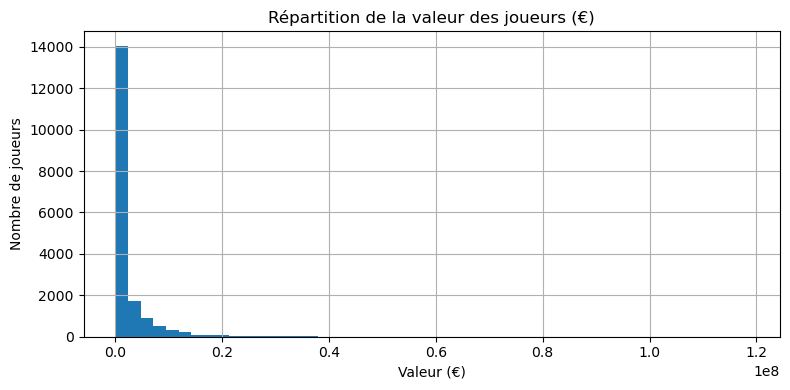

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
df["Value"].dropna().hist(bins=50)
plt.title("Répartition de la valeur des joueurs (€)")
plt.xlabel("Valeur (€)")
plt.ylabel("Nombre de joueurs")
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
plt.figure(figsize=(6, 6))
plt.scatter(df["Height_cm"], df["Weight_kg"], alpha=0.4)
plt.title("Taille vs Poids des joueurs")
plt.xlabel("Taille (cm)")
plt.ylabel("Poids (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Height_cm'

<Figure size 600x600 with 0 Axes>

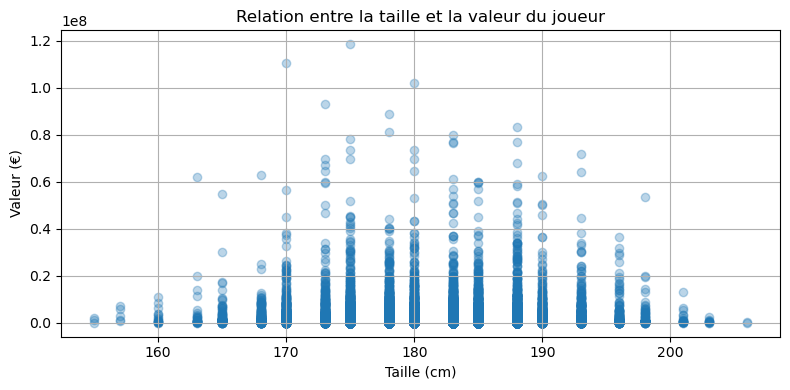

In [55]:
plt.figure(figsize=(8, 4))
plt.scatter(df["Height_cm"], df["Value"], alpha=0.3)
plt.title("Relation entre la taille et la valeur du joueur")
plt.xlabel("Taille (cm)")
plt.ylabel("Valeur (€)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("fifa_cleaned.csv", index=False)


In [54]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      18207 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  object        
 9   Preferred Foot            18207 non-null  object        
 10  International Reputation  18207 non-null  float64       
 11  Weak Foot                 18207 non-null  float64       
 12  Skill Moves       

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Joined_Year,Contract_Year,Years_In_Club,Years_Remaining,Contract_Status
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,Left,...,11.0,15.0,14.0,8.0,226500000.0,2004.0,2021.0,21.0,-4.0,Expiring Soon
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,Right,...,11.0,15.0,14.0,11.0,127100000.0,2018.0,2022.0,7.0,-3.0,Expiring Soon
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,Right,...,9.0,15.0,15.0,11.0,228100000.0,2017.0,2022.0,8.0,-3.0,Expiring Soon
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,Right,...,85.0,87.0,88.0,94.0,138600000.0,2011.0,2020.0,14.0,-5.0,Expiring Soon
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,Right,...,13.0,5.0,10.0,13.0,196400000.0,2015.0,2023.0,10.0,-2.0,Expiring Soon


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

vars_to_keep = ['Overall', 'Potential', 'Value', 'Wage', 'Age', 'Dribbling', 
                'BallControl', 'ShortPassing', 'Finishing', 'Strength']

plt.figure(figsize=(10, 8))
sns.heatmap(df_sample[vars_to_keep].corr(), annot=True, cmap="coolwarm")
plt.title("Corrélations entre variables sélectionnées")
plt.show()


NameError: name 'df_sample' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
df_sample.corr(numeric_only=True)["Overall"].sort_values(ascending=False).head(10)


<Axes: xlabel='Overall', ylabel='Value'>

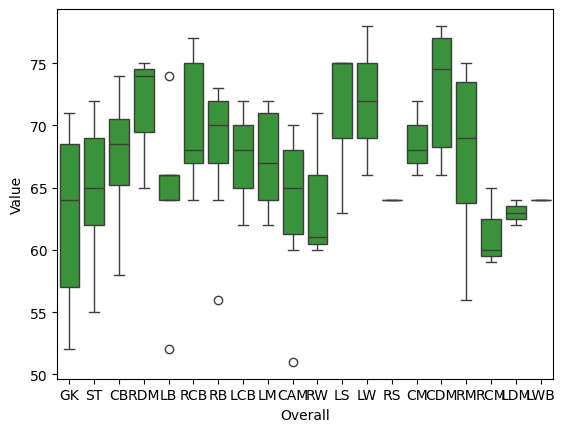

In [79]:
sns.scatterplot(data=df_sample, x="Overall", y="Value")
sns.scatterplot(data=df_sample, x="Potential", y="Wage")
sns.boxplot(data=df_sample, x="Position", y="Overall")


In [63]:
# Créer un échantillon aléatoire de 100 lignes
df_sample = df.sample(n=100, random_state=1)

# Puis ajouter la colonne Age_Group
df_sample["Age_Group"] = pd.cut(df_sample["Age"], 
                                bins=[15, 20, 25, 30, 35, 45], 
                                labels=["<20", "21-25", "26-30", "31-35", "36+"])

# Moyenne des notes globales par groupe d'âge
df_sample.groupby("Age_Group")["Overall"].mean()


C:\Users\pc\AppData\Local\Temp\ipykernel_15188\1710804560.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sample.groupby("Age_Group")["Overall"].mean()


Age_Group
<20      59.375000
21-25    65.600000
26-30    69.037037
31-35    70.312500
36+      63.000000
Name: Overall, dtype: float64

In [67]:
def convert_wage(value):
    value = value.replace('€', '').replace('K', '000').replace('M', '000000')
    return float(value)

# Appliquer la conversion sur la colonne 'Wage' si elle est de type str
if df_sample["Wage"].dtype == 'object':
    df_sample["Wage"] = df_sample["Wage"].apply(convert_wage)

# Même chose pour 'Value' si tu veux l'utiliser
if df_sample["Value"].dtype == 'object':
    df_sample["Value"] = df_sample["Value"].apply(convert_wage)


In [69]:
df_sample[(df_sample["Overall"] > 85) & (df_sample["Wage"] < 100000)][["Name", "Club", "Overall", "Wage", "Value"]]


,Name,Club,Overall,Wage,Value


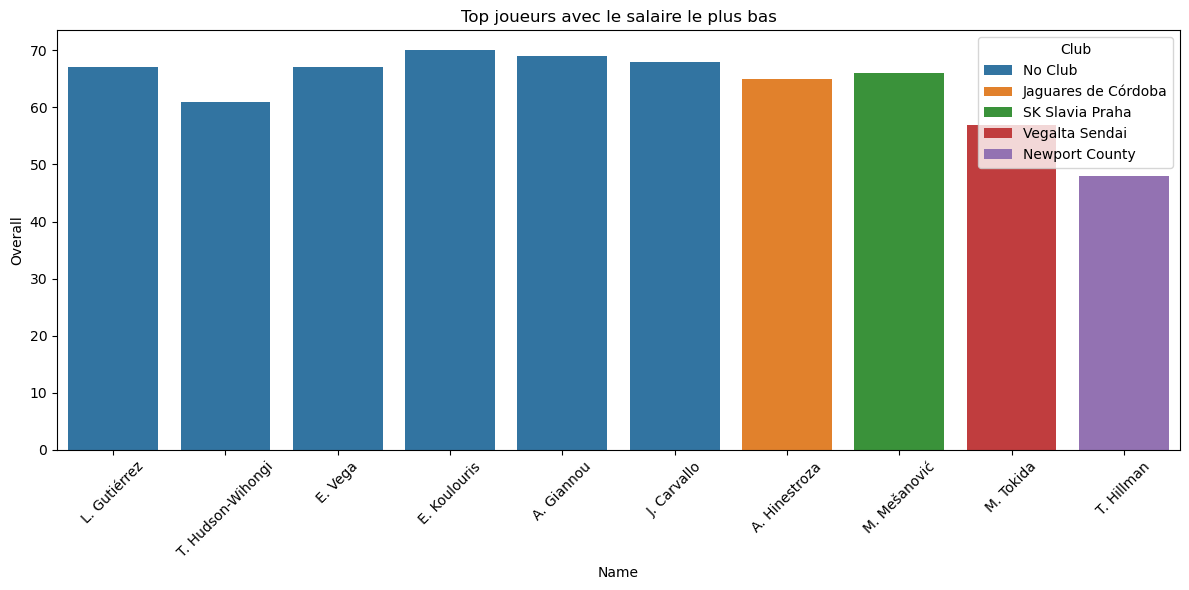

,Name,Club,Value,Wage,Value_to_Wage_Ratio
813,L. Trossard,KRC Genk,14000000.0,17000.0,823.529412
2285,Bruno Varela,SL Benfica,5500000.0,7000.0,785.714286
3272,M. Murillo,New York Red Bulls,3900000.0,5000.0,780.000000
13060,W. Meyiwa,Kaizer Chiefs,750000.0,1000.0,750.000000
272,Jonathan Viera,Beijing Sinobo Guoan FC,22500000.0,31000.0,725.806452
9628,M. Mešanović,SK Slavia Praha,675000.0,1000.0,675.000000
10710,H. Ekstein,Kaizer Chiefs,625000.0,1000.0,625.000000
10944,K. Tokstad,Strømsgodset IF,575000.0,1000.0,575.000000
13817,J. Teze,PSV,550000.0,1000.0,550.000000
12649,M. Bringaker,IK Start,550000.0,1000.0,550.000000


In [75]:
# Juste les 10 meilleurs joueurs avec le plus bas salaire
top_underpaid = df_sample.sort_values(by="Wage").head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_underpaid, x="Name", y="Overall", hue="Club")
plt.title("Top joueurs avec le salaire le plus bas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_sample["Value_to_Wage_Ratio"] = df_sample["Value"] / df_sample["Wage"]
df_sample.sort_values("Value_to_Wage_Ratio", ascending=False).head(10)[["Name", "Club", "Value", "Wage", "Value_to_Wage_Ratio"]]



In [77]:
vars_to_keep = [
    'Name', 'Age', 'Nationality', 'Overall', 'Potential',
    'Value', 'Wage',
    'Positioning', 'Finishing', 'ShortPassing', 'BallControl', 'Dribbling',
    'Strength', 'Vision', 'Composure',
    'Acceleration', 'SprintSpeed', 'Stamina', 'Aggression'
]
df_prepared = df[vars_to_keep].copy()
df_prepared.head()


,Name,Age,Nationality,Overall,Potential,Value,Wage,Positioning,Finishing,ShortPassing,BallControl,Dribbling,Strength,Vision,Composure,Acceleration,SprintSpeed,Stamina,Aggression
0,L. Messi,31,Argentina,94,94,110500000.0,€565K,94.0,95.0,90.0,96.0,97.0,59.0,94.0,96.0,91.0,86.0,72.0,48.0
1,Cristiano Ronaldo,33,Portugal,94,94,77000000.0,€405K,95.0,94.0,81.0,94.0,88.0,79.0,82.0,95.0,89.0,91.0,88.0,63.0
2,Neymar Jr,26,Brazil,92,93,118500000.0,€290K,89.0,87.0,84.0,95.0,96.0,49.0,87.0,94.0,94.0,90.0,81.0,56.0
3,De Gea,27,Spain,91,93,72000000.0,€260K,12.0,13.0,50.0,42.0,18.0,64.0,68.0,68.0,57.0,58.0,43.0,38.0
4,K. De Bruyne,27,Belgium,91,92,102000000.0,€355K,87.0,82.0,92.0,91.0,86.0,75.0,94.0,88.0,78.0,76.0,90.0,76.0


In [83]:
def convert_money(value):
    if isinstance(value, str):
        value = value.replace('€', '')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
        else:
            return float(value)
    elif isinstance(value, (int, float)):
        return value  # déjà numérique
    return np.nan  # sinon valeur invalide


In [85]:
df_prepared['Value'] = df_prepared['Value'].apply(convert_money)
df_prepared['Wage'] = df_prepared['Wage'].apply(convert_money)


In [87]:
missing = df_prepared.isnull().sum()
print("Variables avec valeurs manquantes :\n", missing[missing > 0])


Variables avec valeurs manquantes :
 Series([], dtype: int64)


In [89]:
df_prepared.dropna(inplace=True)


In [91]:
df_prepared.describe()


,Age,Overall,Potential,Value,Wage,Positioning,Finishing,ShortPassing,BallControl,Dribbling,Strength,Vision,Composure,Acceleration,SprintSpeed,Stamina,Aggression
count,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,2.408861e+06,9724.007250,49.758774,45.372659,58.448289,58.138079,55.147251,65.048388,53.184489,58.413687,64.344538,64.458670,62.955347,55.639424
std,4.669943,6.908930,6.136496,5.594379e+06,22000.681753,19.750860,19.702833,15.147144,17.067695,19.206656,13.212891,14.530125,12.019511,15.468291,15.205691,16.379089,17.705678
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,38.000000,30.000000,53.000000,54.000000,49.000000,58.000000,44.000000,51.000000,56.000000,57.000000,56.000000,43.000000
50%,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,55.000000,49.000000,62.000000,63.000000,61.000000,66.000000,55.000000,59.000000,67.000000,67.000000,66.000000,59.000000
75%,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,64.000000,62.000000,68.000000,69.000000,68.000000,74.000000,64.000000,67.000000,75.000000,75.000000,74.000000,69.000000
max,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,95.000000,95.000000,93.000000,96.000000,97.000000,97.000000,94.000000,96.000000,97.000000,96.000000,96.000000,95.000000


In [97]:
def convert_money(value):
    if isinstance(value, str):
        value = value.replace('€', '')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
        else:
            return float(value)
    return value  # Si c'est déjà un float, on le renvoie tel quel



In [99]:
df_prepared['Value'] = df_prepared['Value'].apply(convert_money)
df_prepared['Wage'] = df_prepared['Wage'].apply(convert_money)

In [101]:
df_prepared[['Name', 'Value', 'Wage']].head()


,Name,Value,Wage
0,L. Messi,110500000.0,565000.0
1,Cristiano Ronaldo,77000000.0,405000.0
2,Neymar Jr,118500000.0,290000.0
3,De Gea,72000000.0,260000.0
4,K. De Bruyne,102000000.0,355000.0


In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['Overall', 'Potential', 'Value', 'Wage', 
                 'Positioning', 'Finishing', 'ShortPassing', 'BallControl', 
                 'Dribbling', 'Strength', 'Vision', 'Composure', 
                 'Acceleration', 'SprintSpeed', 'Stamina', 'Aggression']

df_prepared[cols_to_scale] = scaler.fit_transform(df_prepared[cols_to_scale])


In [105]:
df_prepared.info()
df_prepared.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18207 non-null  object 
 1   Age           18207 non-null  int64  
 2   Nationality   18207 non-null  object 
 3   Overall       18207 non-null  float64
 4   Potential     18207 non-null  float64
 5   Value         18207 non-null  float64
 6   Wage          18207 non-null  float64
 7   Positioning   18207 non-null  float64
 8   Finishing     18207 non-null  float64
 9   ShortPassing  18207 non-null  float64
 10  BallControl   18207 non-null  float64
 11  Dribbling     18207 non-null  float64
 12  Strength      18207 non-null  float64
 13  Vision        18207 non-null  float64
 14  Composure     18207 non-null  float64
 15  Acceleration  18207 non-null  float64
 16  SprintSpeed   18207 non-null  float64
 17  Stamina       18207 non-null  float64
 18  Aggression    18207 non-nu

,Age,Overall,Potential,Value,Wage,Positioning,Finishing,ShortPassing,BallControl,Dribbling,Strength,Vision,Composure,Acceleration,SprintSpeed,Stamina,Aggression
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,0.421640,0.495900,0.020328,0.017211,0.523777,0.477607,0.628476,0.605605,0.568528,0.670602,0.565792,0.608476,0.663346,0.671444,0.655785,0.585678
std,4.669943,0.143936,0.130564,0.047210,0.038939,0.207904,0.207398,0.162873,0.177788,0.198007,0.136215,0.154576,0.125203,0.159467,0.158393,0.170616,0.186376
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.333333,0.404255,0.002532,0.001770,0.400000,0.315789,0.569892,0.562500,0.505155,0.597938,0.468085,0.531250,0.577320,0.593750,0.583333,0.452632
50%,25.000000,0.416667,0.489362,0.005696,0.005310,0.578947,0.515789,0.666667,0.656250,0.628866,0.680412,0.585106,0.614583,0.690722,0.697917,0.687500,0.621053
75%,28.000000,0.520833,0.574468,0.016878,0.015929,0.673684,0.652632,0.731183,0.718750,0.701031,0.762887,0.680851,0.697917,0.773196,0.781250,0.770833,0.726316
max,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
# Création du score de performance pondéré
df_prepared['Performance_Score'] = (
    0.25 * df_prepared['Overall'] +
    0.15 * df_prepared['Potential'] +
    0.10 * df_prepared['BallControl'] +
    0.10 * df_prepared['Dribbling'] +
    0.10 * df_prepared['ShortPassing'] +
    0.10 * df_prepared['Finishing'] +
    0.05 * df_prepared['Vision'] +
    0.05 * df_prepared['Composure'] +
    0.05 * df_prepared['Stamina'] +
    0.05 * df_prepared['Strength']
)
df_prepared[['Name', 'Age', 'Nationality', 'Performance_Score']].sort_values(
    by='Performance_Score', ascending=False
).head(10)


,Name,Age,Nationality,Performance_Score
0,L. Messi,31,Argentina,0.961495
1,Cristiano Ronaldo,33,Portugal,0.951142
2,Neymar Jr,26,Brazil,0.925709
4,K. De Bruyne,27,Belgium,0.924861
5,E. Hazard,27,Belgium,0.923570
7,L. Suárez,31,Uruguay,0.919727
15,P. Dybala,24,Argentina,0.908613
6,L. Modrić,32,Croatia,0.905994
25,K. Mbappé,19,France,0.905365
10,R. Lewandowski,29,Poland,0.898256
